#reading folder_path from antispoofing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#df=pd.read_csv(r"C:\Users\pindi\OneDrive\Documents\anti-spoofing\df_anti-spoofing.csv")

In [3]:
#df.columns

In [4]:
#pd.set_option('display.max_columns',None)
#pd.set_option('display.max_colwidth',-1)

In [5]:
#df['live_selfie']

In [6]:
#df_replay=df['replay']

In [7]:
#df_replay.iloc[3]=r'replay/0001ffba3c--628c9dbb2579312f1ac7ee6f__-  20__- 22.mp4'

In [8]:
#folder_path,label=[],[]

In [9]:
#for j in range(1,5):
#    row=[]
#    for i in range(0,9):
#        k=df.iloc[i][j].split('/')[0]
#        l=str(df.iloc[i][j].split('/')).split('--')[-1][:6]
#        row.append(os.path.join(r"C:\Users\pindi\OneDrive\Documents\saving images",k,l))
#        os.makedirs(row[i],exist_ok=True)
    #folder_path.append(row)

In [10]:
'''for j in range(0,4):
    for i in range(0,9):
        print(folder_path[j][i])
    print('***********************************************************************************************************')'''

"for j in range(0,4):\n    for i in range(0,9):\n        print(folder_path[j][i])\n    print('***********************************************************************************************************')"

#reading images to RGB values

In [11]:
import cv2
import tensorflow as tf
import PIL

In [12]:
img=cv2.imread(r"C:\saving\live_video\62294e\frame_0.jpg")

In [13]:
type(img)

numpy.ndarray

In [14]:
img.shape

(1920, 1080, 3)

In [15]:
k=cv2.resize(img,(250,250))

In [16]:
type(k)

numpy.ndarray

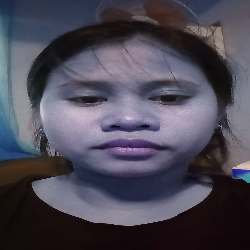

In [17]:
PIL.Image.fromarray(k)

In [18]:
import pathlib
data_dir=pathlib.Path(r"C:\saving")
data_dir

WindowsPath('C:/saving')

In [19]:
image_count=len(list(data_dir.glob('*/*/*')))
image_count

5580

In [20]:
live_62294e=list(data_dir.glob('live_video/*/*'))

In [21]:
#"C:\Users\pindi\OneDrive\Documents\saving images\cut-out printouts"

In [22]:
len(live_62294e)

2966

In [23]:
import PIL

In [24]:
#PIL.Image.open(str(live_62294e[0]))

In [25]:
person_images_dict={
    'live_video':list(data_dir.glob('live_video/*/*')),
    'cut-out printouts':list(data_dir.glob('cut-out printouts/*/*')),
}

In [26]:
person_lables_dict={
    'live_video':0,
    'cut-out printouts':1 
}

In [27]:
len(person_images_dict['live_video'])

2966

In [28]:
for key in person_images_dict:
    print(key,len(person_images_dict[key]))

live_video 2966
cut-out printouts 2343


In [29]:
img=cv2.imread(str(person_images_dict['live_video'][0]))

In [30]:
x,y=[],[]
for person_name,images in person_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(224,224))
        x.append(resized_img)
        y.append(person_lables_dict[person_name])

In [31]:
x=np.array(x)
y=np.array(y)

In [32]:
x.shape

(5309, 224, 224, 3)

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True,stratify=y,random_state=0)

In [34]:
x_train.shape

(4247, 224, 224, 3)

In [35]:
y_train.shape

(4247,)

In [36]:
x_test.shape

(1062, 224, 224, 3)

Text(0.5, 0, '0')

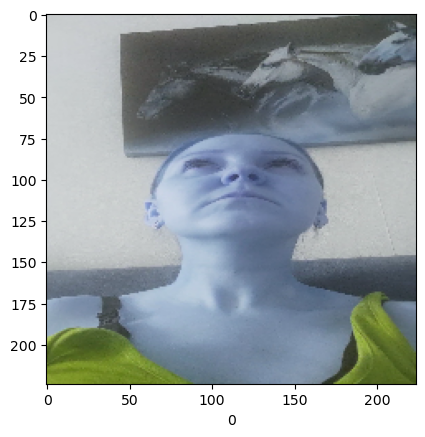

In [37]:
plt.imshow(x_train[1100])
plt.xlabel(y_train[1100])

In [38]:
print(y_train[10])

1


In [39]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

#building model

In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Model
from keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Dropout,Input,Flatten
from tensorflow.keras.models import Sequential
from sklearn.model_selection import StratifiedKFold
import tensorflow_hub as hub

In [41]:
from keras.layers import Dense,Dropout,Input,Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import model_from_json
import json

In [42]:
#!pip install tensorflow_hub

In [43]:
mobilenet = MobileNetV2(weights="imagenet",include_top=False,input_tensor=Input(shape=(224,224,3)))

In [44]:
mobilenet.trainable = False

In [45]:
output = Flatten(data_format='channels_last')(mobilenet.output)
output = Dropout(0.5)(output)
output=Dense(5,activation='relu')(output)
prediction = Dense(1,activation='sigmoid')(output)

In [46]:
model = Model(inputs = mobilenet.input,outputs = prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [47]:
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(
    learning_rate=0.000001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
),
  metrics=['accuracy']
)

In [48]:
model.fit(
    x_train_scaled, y_train,
    batch_size=32,
    steps_per_epoch=len(x_train_scaled) // 50,
    epochs=10,
)


Epoch 1/10
84/84 [==============================] - 159s 2s/step - loss: 1.4810 - accuracy: 0.4557
Epoch 2/10
84/84 [==============================] - 142s 2s/step - loss: 0.9995 - accuracy: 0.5539
Epoch 3/10
84/84 [==============================] - 98s 1s/step - loss: 0.7880 - accuracy: 0.6462
Epoch 4/10
84/84 [==============================] - 90s 1s/step - loss: 0.6319 - accuracy: 0.7081
Epoch 5/10
84/84 [==============================] - 84s 995ms/step - loss: 0.5468 - accuracy: 0.7566
Epoch 6/10
84/84 [==============================] - 89s 1s/step - loss: 0.4489 - accuracy: 0.8051
Epoch 7/10
84/84 [==============================] - 78s 928ms/step - loss: 0.3892 - accuracy: 0.8339
Epoch 8/10
84/84 [==============================] - 79s 938ms/step - loss: 0.3376 - accuracy: 0.8574
Epoch 9/10
84/84 [==============================] - 88s 1s/step - loss: 0.2796 - accuracy: 0.8843
Epoch 10/10
84/84 [==============================] - 59s 707ms/step - loss: 0.2435 - accuracy: 0.8996


In [49]:
model.evaluate(x_test_scaled,y_test)

34/34 [==============================] - 43s 1s/step - loss: 0.1104 - accuracy: 0.9812


[0.11039452254772186, 0.9811676144599915]

In [50]:
y_predict=model.predict(x_test_scaled)

34/34 [==============================] - 27s 667ms/step


In [51]:
prediction_class=[]

In [52]:
for i in y_predict:
    if i>0.5:
         prediction_class.append(1)
    else:
        prediction_class.append(0)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(classification_report(y_test,prediction_class))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       593
           1       1.00      0.96      0.98       469

    accuracy                           0.98      1062
   macro avg       0.98      0.98      0.98      1062
weighted avg       0.98      0.98      0.98      1062



In [55]:
confusion_matrix(y_test,prediction_class)

array([[593,   0],
       [ 20, 449]], dtype=int64)

#outside testing

In [70]:
testing_images=list(data_dir.glob('testing/*'))

In [57]:
x=[]
for image in testing_images:
    test_img=cv2.imread(str(image))
    test_resized_img=cv2.resize(test_img,(224,224))
    x.append(test_resized_img)

In [58]:
x_test_1=np.array(x)

In [59]:
x_test_1.shape

(8, 224, 224, 3)

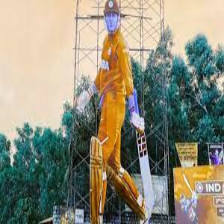

In [60]:
PIL.Image.fromarray(x_test_1[1])

In [61]:
#test_resized_img=test_resized_img/255
#test_resized_img=np.expand_dims(test_resized_img,axis=0)

In [62]:
x_test_scaled_1=x_test_1/255

In [63]:
y_test_predict=model.predict(x_test_scaled_1)
y_test_predict

1/1 [==============================] - 3s 3s/step


array([[0.9860943 ],
       [0.8343032 ],
       [0.9319635 ],
       [0.62417006],
       [0.92484623],
       [0.7993208 ],
       [0.76929843],
       [0.51031685]], dtype=float32)

In [64]:
y_test_classes=[]

In [65]:
for i in y_test_predict:
    if i<=0.5:
         y_test_classes.append(0)
    else:
        y_test_classes.append(1)

In [66]:
print(y_test_classes)

[1, 1, 1, 1, 1, 1, 1, 1]


In [67]:
len(y_test_classes)

8

In [68]:
classes=[ 'live_video', 'cut-out_printouts']

In [69]:
for i in y_test_classes:
    print(classes[i])

cut-out_printouts
cut-out_printouts
cut-out_printouts
cut-out_printouts
cut-out_printouts
cut-out_printouts
cut-out_printouts
cut-out_printouts
